In [1133]:
#%pip install dask
#%pip install streamlit

In [1134]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st


from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split    
from sklearn.metrics import confusion_matrix            
from sklearn.metrics import classification_report       # for detailed classification metrics
from sklearn.linear_model import LogisticRegression    
from sklearn.ensemble import RandomForestClassifier    
from sklearn.tree import DecisionTreeClassifier        
from sklearn.svm import SVC                            
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.naive_bayes import GaussianNB   
from sklearn.ensemble import GradientBoostingClassifier

import data

In [1135]:
df = pd.read_csv("data/SaYoPillow.csv")
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


UNDERSTAND DATA

In [1136]:
df.describe().round()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
count,630.0,630.0,630.0,630.0,630.0,630.0,630.0,630.0,630.0
mean,72.0,22.0,93.0,12.0,91.0,88.0,4.0,64.0,2.0
std,19.0,4.0,4.0,4.0,4.0,12.0,3.0,10.0,1.0
min,45.0,16.0,85.0,4.0,82.0,60.0,0.0,50.0,0.0
25%,52.0,18.0,90.0,8.0,88.0,81.0,0.0,56.0,1.0
50%,70.0,21.0,93.0,11.0,91.0,90.0,4.0,62.0,2.0
75%,91.0,25.0,96.0,16.0,94.0,99.0,6.0,72.0,3.0
max,100.0,30.0,99.0,19.0,97.0,105.0,9.0,85.0,4.0


In [1137]:
uniques = df['sl'].unique()
uniques.sort()
uniques

array([0, 1, 2, 3, 4], dtype=int64)

In [1138]:
df.tail()


,sr,rr,t,lm,bo,rem,sr.1,hr,sl
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1
629,73.920,21.392,93.392,11.392,91.392,91.96,4.088,63.48,2


In [1139]:

df.count()


sr      630
rr      630
t       630
lm      630
bo      630
rem     630
sr.1    630
hr      630
sl      630
dtype: int64

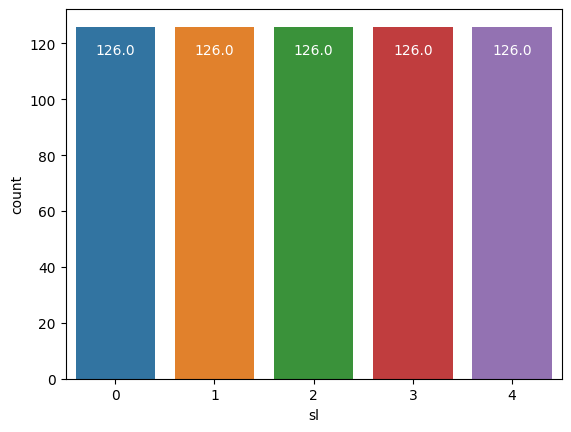

In [1140]:
ax=sns.countplot(x=df['sl'], data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='top', color='white', size=10)


In [1141]:
print("Rows and Columns of the dataset :- ",df.shape)

Rows and Columns of the dataset :-  (630, 9)


In [1142]:
df.columns

Index(['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr.1', 'hr', 'sl'], dtype='object')

In [1143]:
df.columns=['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement', 'blood_oxygen',
             'eye_movement', 'sleeping_hours', 'heart_rate', 'stress_level']

sr' or 'snoring_rate'

'rr' or 'respiration_rate'

't' or 'body_temperature'

'lm' or 'limb_movement'

'bo' or 'blood_oxygen'

'rem' or 'eye_movement'

'sr.1' or 'sleeping_hours'

'hr' or 'heart_rate'

'sl' or 'stress_level'

In [1144]:
#df.columns = ['snoring_rate', 'respiration_rate', 'body_temp', 'limb_movem', 'blood_oxygen', 'eye_movem', 'spleeping_hours', 'heart_rate', 'stress level']


In [1145]:

df.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [1146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring_rate      630 non-null    float64
 1   respiration_rate  630 non-null    float64
 2   body_temperature  630 non-null    float64
 3   limb_movement     630 non-null    float64
 4   blood_oxygen      630 non-null    float64
 5   eye_movement      630 non-null    float64
 6   sleeping_hours    630 non-null    float64
 7   heart_rate        630 non-null    float64
 8   stress_level      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [1147]:
df.isnull().sum()

snoring_rate        0
respiration_rate    0
body_temperature    0
limb_movement       0
blood_oxygen        0
eye_movement        0
sleeping_hours      0
heart_rate          0
stress_level        0
dtype: int64

array([[<Axes: title={'center': 'snoring_rate'}>,
        <Axes: title={'center': 'respiration_rate'}>,
        <Axes: title={'center': 'body_temperature'}>],
       [<Axes: title={'center': 'limb_movement'}>,
        <Axes: title={'center': 'blood_oxygen'}>,
        <Axes: title={'center': 'eye_movement'}>],
       [<Axes: title={'center': 'sleeping_hours'}>,
        <Axes: title={'center': 'heart_rate'}>,
        <Axes: title={'center': 'stress_level'}>]], dtype=object)

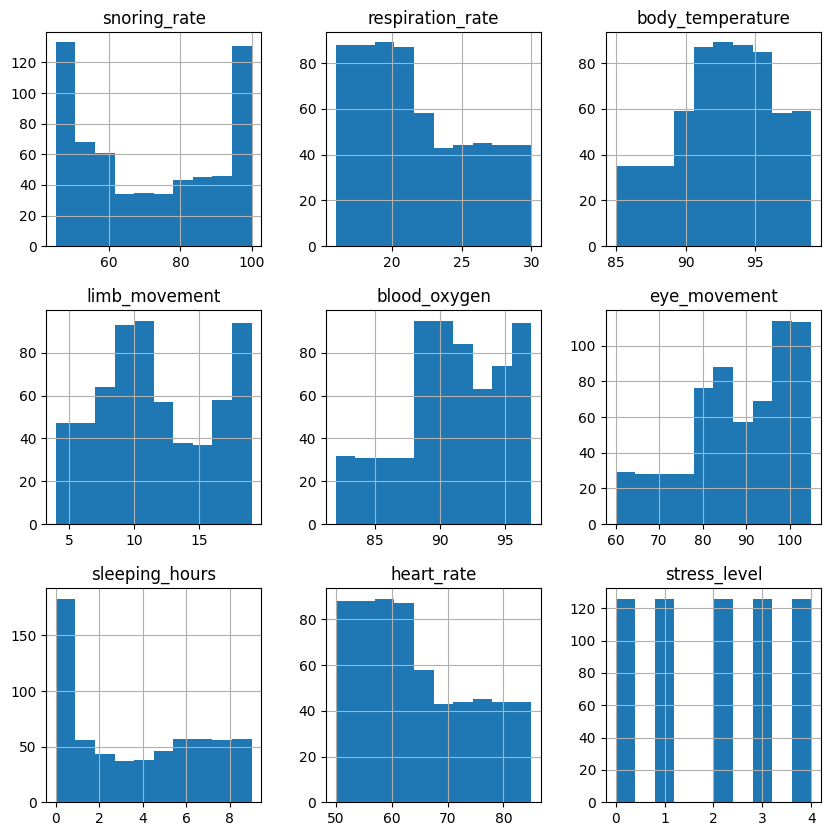

In [1148]:
df.hist(figsize=(10,10))

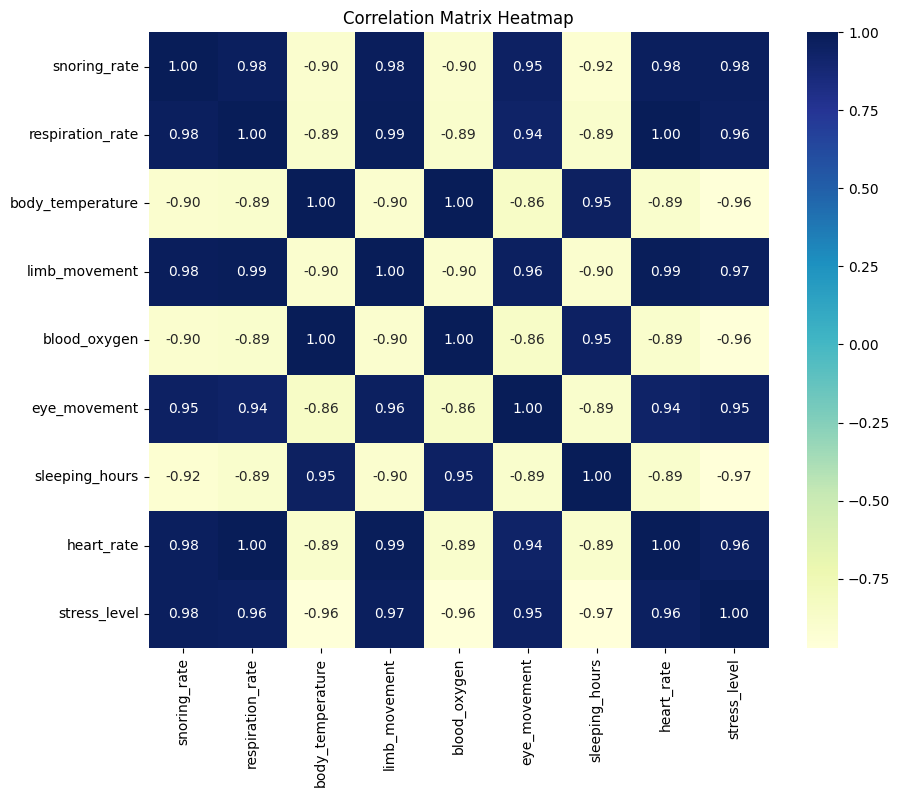

In [1149]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

train, test split

In [1150]:
X = df.drop(['stress_level'], axis=1)
y = df['stress_level']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,train_size=0.7, shuffle=True, random_state=42)


In [1151]:
print("X shape: ", X.shape)
print("y shape: ", y.shape)
print()
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X shape:  (630, 8)
y shape:  (630,)

X_train shape: (441, 8)
y_train shape: (441,)
X_test shape: (189, 8)
y_test shape: (189,)


In [1152]:
d = df['snoring_rate'].unique()
d.sort()


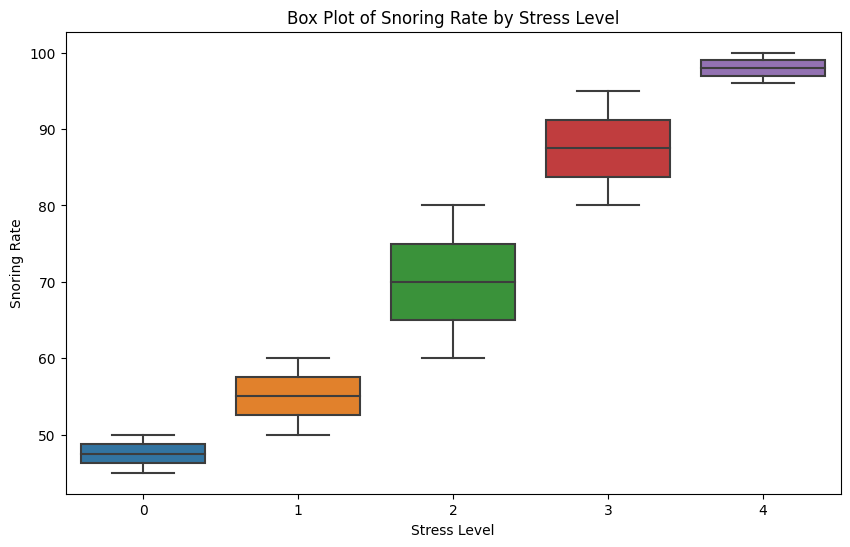

In [1153]:
data_for_boxplot = df[['snoring_rate', 'stress_level']]


plt.figure(figsize=(10, 6))
sns.boxplot(x='stress_level', y='snoring_rate', data=data_for_boxplot)
plt.title('Box Plot of Snoring Rate by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Snoring Rate')
plt.show()

Splitting dataset

1. Decision Tree Classifier
2. Random Forest Classifier
3. KNN Classifier
4. (SVM Classifier)
5. Gaussian Naive Bayes

DECISION TREE CLASSIFIER
--

In [1154]:
from sklearn.tree import DecisionTreeClassifier

In [1155]:
decision_tree_cl = DecisionTreeClassifier(criterion="gini", splitter="best")
decision_tree_cl.fit(x_train, y_train)

DecisionTreeClassifier()

In [1156]:
decision_tree_cl.get_depth()

4

In [1157]:
y_predict = decision_tree_cl.predict(x_test)

In [1158]:
decision_tree_cl.score(x_test,y_test)
acc = accuracy_score(y_test,y_predict)
print(acc)

0.9788359788359788


Text(0.5, 1.0, 'Decision Tree Classifier')

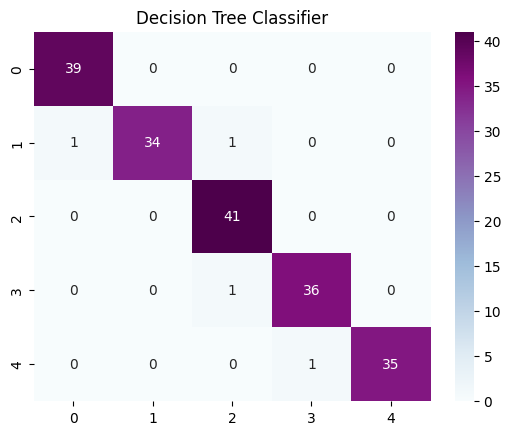

In [1159]:
matrixdecision = confusion_matrix(y_test,y_predict)

sns.heatmap(matrixdecision,annot=True,cmap="BuPu")
plt.title("Decision Tree Classifier")


In [1160]:
#%pip install dask
#%pip install streamlit

In [1161]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st


from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.model_selection import train_test_split    
from sklearn.metrics import confusion_matrix            
from sklearn.metrics import classification_report       # for detailed classification metrics
from sklearn.linear_model import LogisticRegression    
from sklearn.ensemble import RandomForestClassifier    
from sklearn.tree import DecisionTreeClassifier        
from sklearn.svm import SVC                            
from sklearn.neighbors import KNeighborsClassifier   
from sklearn.naive_bayes import GaussianNB   
from sklearn.ensemble import GradientBoostingClassifier

import data

In [1162]:
df = pd.read_csv("data/SaYoPillow.csv")
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


UNDERSTAND DATA

In [1163]:
df.describe().round()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
count,630.0,630.0,630.0,630.0,630.0,630.0,630.0,630.0,630.0
mean,72.0,22.0,93.0,12.0,91.0,88.0,4.0,64.0,2.0
std,19.0,4.0,4.0,4.0,4.0,12.0,3.0,10.0,1.0
min,45.0,16.0,85.0,4.0,82.0,60.0,0.0,50.0,0.0
25%,52.0,18.0,90.0,8.0,88.0,81.0,0.0,56.0,1.0
50%,70.0,21.0,93.0,11.0,91.0,90.0,4.0,62.0,2.0
75%,91.0,25.0,96.0,16.0,94.0,99.0,6.0,72.0,3.0
max,100.0,30.0,99.0,19.0,97.0,105.0,9.0,85.0,4.0


In [1164]:
uniques = df['sl'].unique()
uniques.sort()
uniques

array([0, 1, 2, 3, 4], dtype=int64)

In [1165]:
df.tail()


,sr,rr,t,lm,bo,rem,sr.1,hr,sl
625,69.600,20.960,92.960,10.960,90.960,89.80,3.440,62.40,2
626,48.440,17.376,98.064,6.752,96.376,73.76,8.376,53.44,0
627,97.504,27.504,86.880,17.752,84.256,101.88,0.000,78.76,4
628,58.640,19.728,95.728,9.728,94.592,84.32,6.728,59.32,1
629,73.920,21.392,93.392,11.392,91.392,91.96,4.088,63.48,2


In [1166]:

df.count()


sr      630
rr      630
t       630
lm      630
bo      630
rem     630
sr.1    630
hr      630
sl      630
dtype: int64

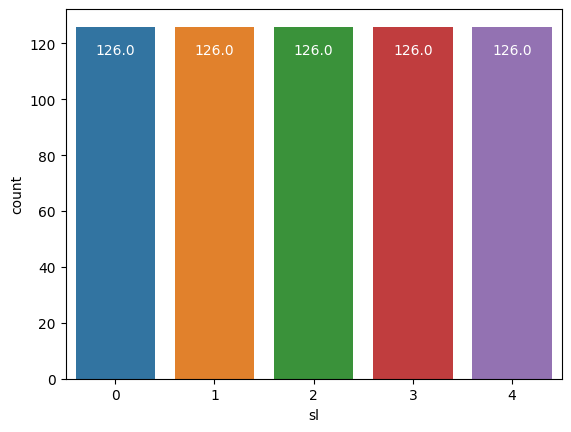

In [1167]:
ax=sns.countplot(x=df['sl'], data=df)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='left', va='top', color='white', size=10)


In [1168]:
print("Rows and Columns of the dataset :- ",df.shape)

Rows and Columns of the dataset :-  (630, 9)


In [1169]:
df.columns

Index(['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr.1', 'hr', 'sl'], dtype='object')

In [1170]:
df.columns=['snoring_rate', 'respiration_rate', 'body_temperature', 'limb_movement', 'blood_oxygen',
             'eye_movement', 'sleeping_hours', 'heart_rate', 'stress_level']

sr' or 'snoring_rate'

'rr' or 'respiration_rate'

't' or 'body_temperature'

'lm' or 'limb_movement'

'bo' or 'blood_oxygen'

'rem' or 'eye_movement'

'sr.1' or 'sleeping_hours'

'hr' or 'heart_rate'

'sl' or 'stress_level'

In [1171]:
#df.columns = ['snoring_rate', 'respiration_rate', 'body_temp', 'limb_movem', 'blood_oxygen', 'eye_movem', 'spleeping_hours', 'heart_rate', 'stress level']


In [1172]:

df.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [1173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring_rate      630 non-null    float64
 1   respiration_rate  630 non-null    float64
 2   body_temperature  630 non-null    float64
 3   limb_movement     630 non-null    float64
 4   blood_oxygen      630 non-null    float64
 5   eye_movement      630 non-null    float64
 6   sleeping_hours    630 non-null    float64
 7   heart_rate        630 non-null    float64
 8   stress_level      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [1174]:
df.isnull().sum()

snoring_rate        0
respiration_rate    0
body_temperature    0
limb_movement       0
blood_oxygen        0
eye_movement        0
sleeping_hours      0
heart_rate          0
stress_level        0
dtype: int64

array([[<Axes: title={'center': 'snoring_rate'}>,
        <Axes: title={'center': 'respiration_rate'}>,
        <Axes: title={'center': 'body_temperature'}>],
       [<Axes: title={'center': 'limb_movement'}>,
        <Axes: title={'center': 'blood_oxygen'}>,
        <Axes: title={'center': 'eye_movement'}>],
       [<Axes: title={'center': 'sleeping_hours'}>,
        <Axes: title={'center': 'heart_rate'}>,
        <Axes: title={'center': 'stress_level'}>]], dtype=object)

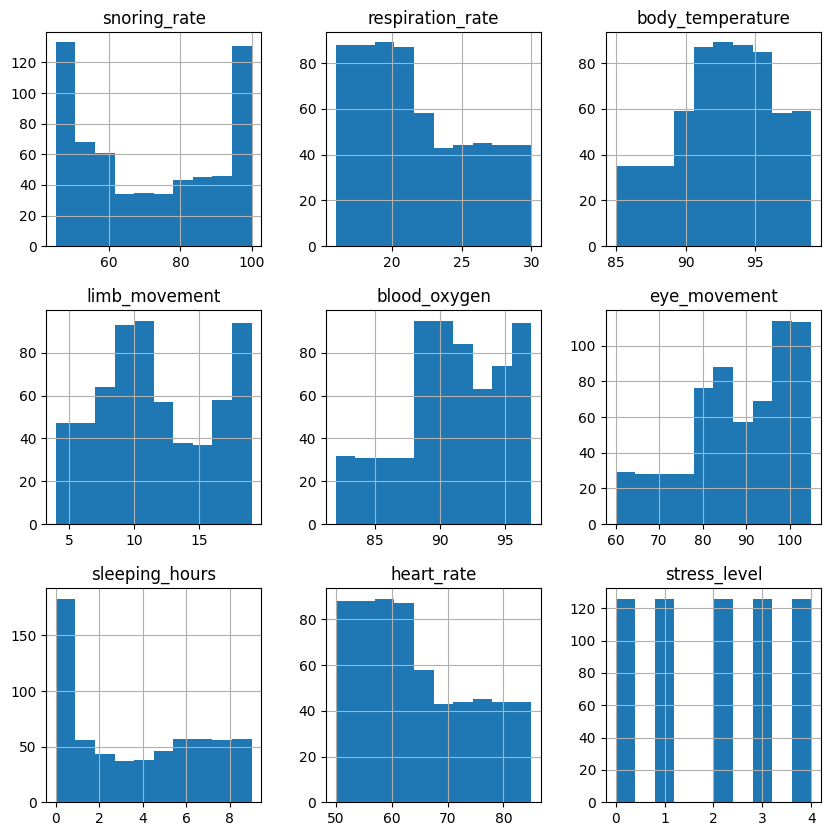

In [1175]:
df.hist(figsize=(10,10))

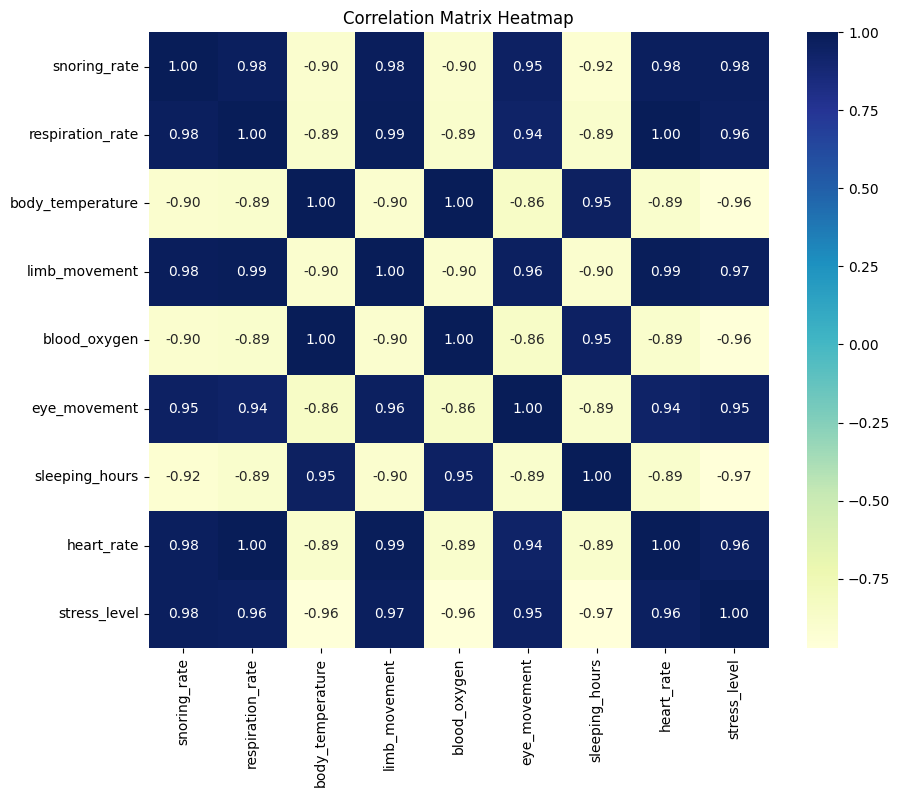

In [1176]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

train, test split

In [1226]:
X = df.drop(['stress_level'], axis=1)
y = df['stress_level']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,train_size=0.7, shuffle=True, random_state=42)


In [1178]:
print("X shape: ", X.shape)
print("y shape: ", y.shape)
print()
print("X_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

X shape:  (630, 8)
y shape:  (630,)

X_train shape: (441, 8)
y_train shape: (441,)
X_test shape: (189, 8)
y_test shape: (189,)


In [1179]:
d = df['snoring_rate'].unique()
d.sort()


Splitting dataset

1. Decision Tree Classifier
2. Random Forest Classifier
3. KNN Classifier
4. (SVM Classifier)
5. Gaussian Naive Bayes

DECISION TREE CLASSIFIER
--

In [1180]:
from sklearn.tree import DecisionTreeClassifier

In [1222]:
decision_tree_cl = DecisionTreeClassifier(criterion="gini", splitter="best")
decision_tree_cl.fit(x_train, y_train)

DecisionTreeClassifier(splitter='random')

In [1223]:
decision_tree_cl.get_depth()

4

In [1224]:
y_predict = decision_tree_cl.predict(x_test)

In [1225]:
decision_tree_cl.score(x_test,y_test)
acc = accuracy_score(y_test,y_predict)
print(acc)

1.0


Text(0.5, 1.0, 'Decision Tree Classifier')

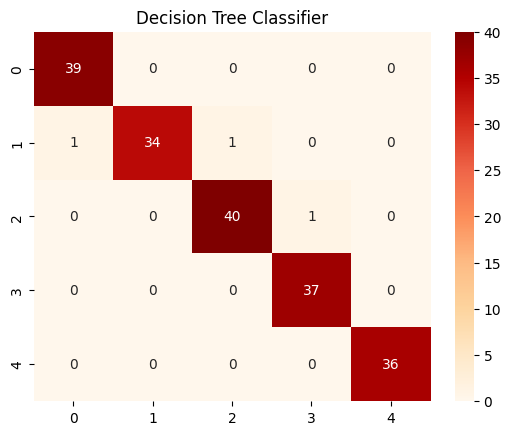

In [1185]:
matrixdecision = confusion_matrix(y_test,y_predict)

sns.heatmap(matrixdecision,annot=True,cmap="OrRd")
plt.title("Decision Tree Classifier")


In [1186]:
accDecision = accuracy_score(y_test, y_predict)
accDecision

0.9841269841269841

In [1187]:
report = classification_report(y_test,y_predict)
print(report)

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       1.00      0.94      0.97        36
           2       0.98      0.98      0.98        41
           3       0.97      1.00      0.99        37
           4       1.00      1.00      1.00        36

    accuracy                           0.98       189
   macro avg       0.98      0.98      0.98       189
weighted avg       0.98      0.98      0.98       189



RANDOM FOREST CLASSIFIER
--

In [1188]:
random_forest = RandomForestClassifier(n_estimators=300)
random_forest.fit(x_train,y_train)

RandomForestClassifier(n_estimators=300)

In [1189]:
random_forest.score(x_test,y_test)

0.9947089947089947

In [1190]:
y_predict = random_forest.predict(x_test)


In [1191]:
accRandom = accuracy_score(y_test, y_predict)
accRandom

0.9947089947089947

Confusion Matrix:


Text(0.5, 1.0, 'Random Forest Classifier')

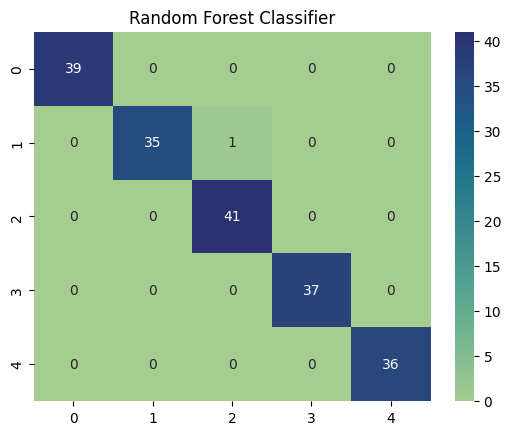

In [1192]:


matrixrandom = confusion_matrix(y_test, y_predict)

print("Confusion Matrix:")

sns.heatmap(matrixrandom,annot=True,cmap="crest")
plt.title("Random Forest Classifier")

In [1193]:
importances = random_forest.feature_importances_

# Loop over each feature and its importance
for i in range(x_train.shape[1]):
    # Print the feature number, name, and importance score
    print("%2d) %-*s %f" % (i + 1, 30, df.columns[i], importances[i]))

 1) snoring_rate                   0.130418
 2) respiration_rate               0.128064
 3) body_temperature               0.124516
 4) limb_movement                  0.123394
 5) blood_oxygen                   0.111911
 6) eye_movement                   0.127411
 7) sleeping_hours                 0.111584
 8) heart_rate                     0.142702


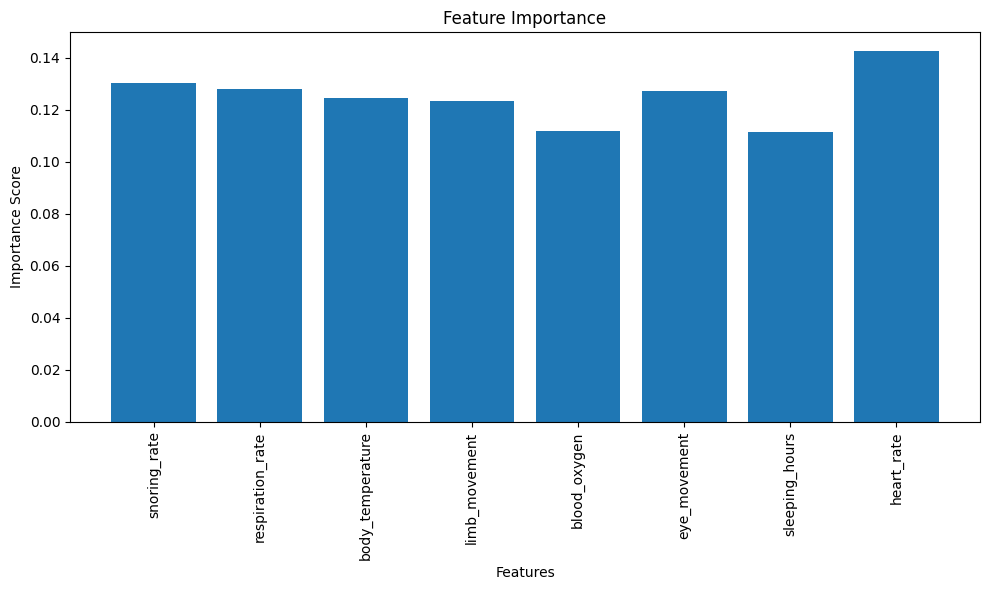

In [1194]:
# Plotting the feature importances as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(range(x_train.shape[1]), importances, align='center')
plt.title('Feature Importance')
plt.xticks(range(x_train.shape[1]), x_train.columns, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

KNN Classifier
--

In [1195]:
knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=45)

In [1196]:
knn.score(x_test,y_test)

1.0

In [1197]:
y_predict = knn.predict(x_test)

matrix = confusion_matrix(y_test, y_predict)

In [1198]:
reportknn = classification_report(y_test,y_predict)
print(reportknn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        36
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36

    accuracy                           1.00       189
   macro avg       1.00      1.00      1.00       189
weighted avg       1.00      1.00      1.00       189



<Axes: >

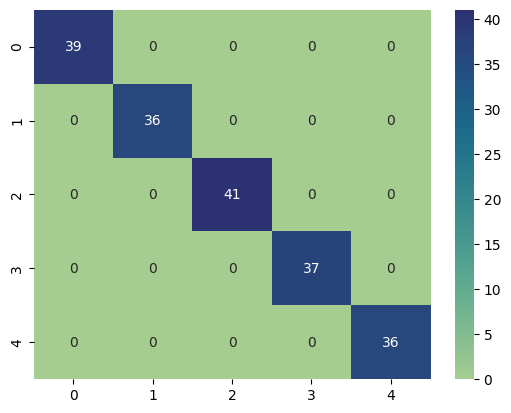

In [1199]:
matrixknn = confusion_matrix(y_test,y_predict)
sns.heatmap(matrixknn,annot=True,cmap="crest")

SVM Classifier
--

In [1227]:
svm = SVC()
svm.fit(x_train,y_train)

SVC()

In [1228]:
svm.score(x_test,y_test)

0.9841269841269841

In [1202]:
y_predict = svm.predict(x_test)


In [1203]:
accSVM= accuracy_score(y_test, y_predict)
accSVM

0.9841269841269841

Text(0.5, 1.0, 'SVM Classifier')

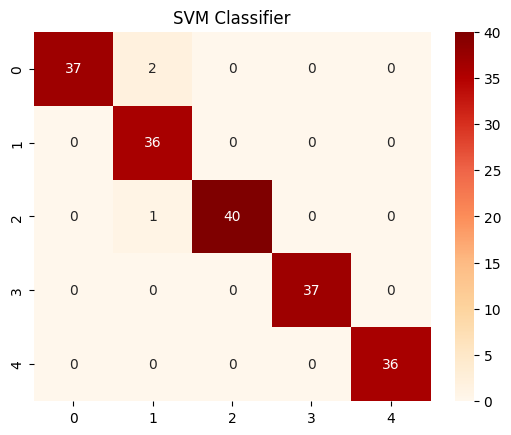

In [1204]:

matrixsvm = confusion_matrix(y_test, y_predict)
sns.heatmap(matrixsvm,annot=True,cmap="OrRd")
plt.title("SVM Classifier")

In [1205]:
report = classification_report(y_test, y_predict)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        39
           1       0.92      1.00      0.96        36
           2       1.00      0.98      0.99        41
           3       1.00      1.00      1.00        37
           4       1.00      1.00      1.00        36

    accuracy                           0.98       189
   macro avg       0.98      0.98      0.98       189
weighted avg       0.99      0.98      0.98       189



Stress prediction

In [1206]:
new_data = pd.DataFrame([[100.0, 29.0, 99.0, 35.0, 90.0, 95.0, 2.0, 80.0]] ,columns=X.columns)

# Predict the stress level for the new data
predicted_stress_level = svm.predict(new_data)

# Dictionary to map integer stress levels to human-readable labels
stress_level_labels = {
    0: "Low/Normal",
    1: "Medium Low",
    2: "Medium",
    3: "Medium High",
    4: "High"
}

# Assuming you already have the 'predicted_stress_level' from the previous code snippet
predicted_stress_label = stress_level_labels[predicted_stress_level[0]]

# Display the human-readable label for the predicted stress level
print("Predicted Stress Label for New Data:",predicted_stress_level[0],"(",predicted_stress_label,")")


Predicted Stress Label for New Data: 4 ( High )


Gaussian Naive Bayes Classifier
--

In [1207]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train,y_train)

GaussianNB()

In [1208]:
y_predict = naive_bayes.predict(x_test)

matrix = confusion_matrix(y_test, y_predict)

In [1209]:
accG = accuracy_score(y_test,y_predict)
accG

1.0

Gradient Boosting Classifier
--

In [1210]:
gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
gradient.fit(x_train, y_train)


GradientBoostingClassifier(max_depth=6, random_state=42)

In [1211]:

# Modell értékelése a tesztadaton
y_pred = gradient.predict(x_test)
accGradient = accuracy_score(y_test, y_pred)
accGradient

0.9788359788359788

Text(0.5, 1.0, 'Gradient Boosting Classifier')

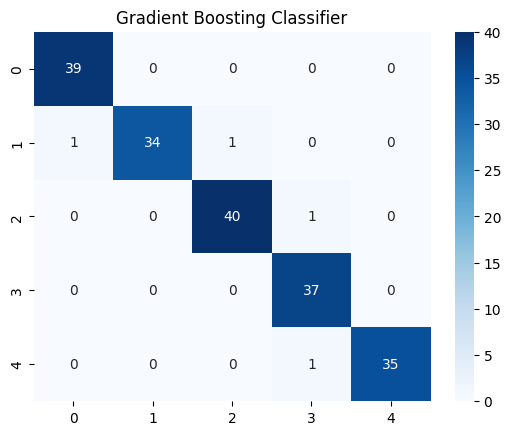

In [1212]:

matrixgrad = confusion_matrix(y_test, y_pred)
sns.heatmap(matrixgrad,annot=True, cmap="Blues")
plt.title("Gradient Boosting Classifier")

Summary
--

In [1213]:
print("Accuracy Scores")
print()
print("Decision Tree Classifier:    ", accDecision.round(3))
print()
print("Random Forest Classifier:    ", accRandom.round(3))
print()
print("SVM Classifier:              ", accSVM.round(3))
print()
print("Gradient Boosting Classifier:",accGradient.round(3))

Accuracy Scores

Decision Tree Classifier:     0.984

Random Forest Classifier:     0.995

SVM Classifier:               0.984

Gradient Boosting Classifier: 0.979


-------------------------------------------------------------------------------